# Import de pacotes

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Conjunto de dados

## Dicionário das variáveis:

 **Temperature (K)}**:

**Luminosity(L/Lo)**:

**Radius(R/Ro)**:

**Absolute magnitude(Mv)**:

**Star Type**: Brown Dwarf = 0, Red Dwarf = 1, White Dwarf = 2, Main Sequence = 3, Supergiant = 4, Hypergiant = 5

**Star color**:

**Spectral Class**:

The Luminosity and radius of each star is calculated w.r.t. that of the values of Sun.

Lo = 3.828 x 10^26 Watts

Ro = 6.9551 x 10^8 m

## Carregamento dos dados

In [2]:
dados = pd.read_csv('stars.csv')

In [3]:
dados.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
dados.shape

(240, 7)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


# Removendo espaços dos nomes das variáveis

In [6]:
dados.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [7]:
dados.columns = ['Temperature_(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute_magnitude(Mv)', 'Star_type', 'Star_color', 'Spectral_Class']

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature_(K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute_magnitude(Mv)  240 non-null    float64
 4   Star_type               240 non-null    int64  
 5   Star_color              240 non-null    object 
 6   Spectral_Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


# Variáveis categóricas

In [9]:
categoricas = dados.dtypes[dados.dtypes == 'object'].index
categoricas

Index(['Star_color', 'Spectral_Class'], dtype='object')

In [10]:
for i in categoricas:
    print(i)
    print(list(dados[i].unique()))
    print()

Star_color
['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white', 'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish', 'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ', 'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ', 'Blue-White']

Spectral_Class
['M', 'B', 'A', 'F', 'O', 'K', 'G']



## Corrigindo strings de Star_color

In [11]:
# Todas letras minúsculas
dados['Star_color'] = dados['Star_color'].str.lower()
dados['Star_color'].unique()

array(['red', 'blue white', 'white', 'yellowish white',
       'pale yellow orange', 'blue', 'blue-white', 'whitish',
       'yellow-white', 'orange', 'white-yellow', 'blue ', 'yellowish',
       'orange-red', 'blue white '], dtype=object)

In [12]:
#Substituir espaço entre palavras por ífem
star_color_split = dados['Star_color'].str.split()
dados['Star_color'] = list(map(lambda x : '-'.join(x), star_color_split))
dados['Star_color'].unique()

array(['red', 'blue-white', 'white', 'yellowish-white',
       'pale-yellow-orange', 'blue', 'whitish', 'yellow-white', 'orange',
       'white-yellow', 'yellowish', 'orange-red'], dtype=object)

In [13]:
#Substituindo 'white-yellow' por 'yellow-white'
dados['Star_color'] = dados['Star_color'].replace('white-yellow' , 'yellow-white')
dados['Star_color'].unique()

array(['red', 'blue-white', 'white', 'yellowish-white',
       'pale-yellow-orange', 'blue', 'whitish', 'yellow-white', 'orange',
       'yellowish', 'orange-red'], dtype=object)

# Variáveis numéricas

In [14]:
numericas = dados.dtypes[dados.dtypes != 'object'].index
numericas

Index(['Temperature_(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute_magnitude(Mv)', 'Star_type'],
      dtype='object')

In [15]:
#Verificando se tem NAs
dados[numericas].isna().sum()

Temperature_(K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute_magnitude(Mv)    0
Star_type                 0
dtype: int64

In [16]:
#Distribuição
dados[numericas].describe()

,Temperature_(K),Luminosity(L/Lo),Radius(R/Ro),Absolute_magnitude(Mv),Star_type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


<AxesSubplot:>

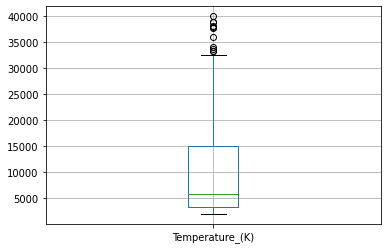

In [17]:
dados.boxplot(numericas[0])

<AxesSubplot:>

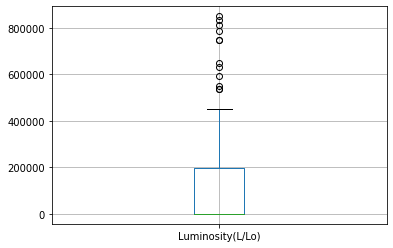

In [18]:
dados.boxplot(numericas[1])

<AxesSubplot:>

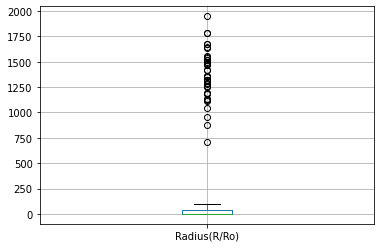

In [19]:
dados.boxplot(numericas[2])

<AxesSubplot:>

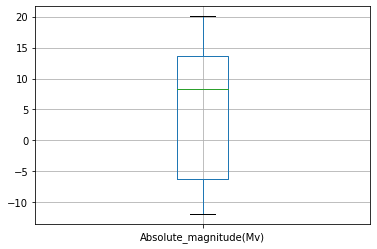

In [20]:
dados.boxplot(numericas[3])

<AxesSubplot:>

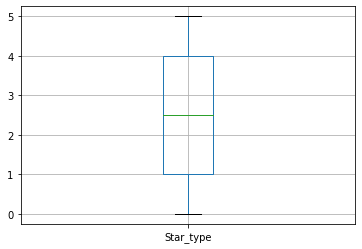

In [21]:
dados.boxplot(numericas[4])

# Exportando dados corrigidos

In [23]:
dados.to_csv('stars_corrigido.csv', index = False)